In [1]:
import os
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors

from plotting_helpers import add_gridlines, set_x_ticks, highlight_k_points
from visualize_correlations import get_k_mesh, calculate_tri_kspace_correlations

import sys
sys.path.append('..')
from correlations import calculate_structure_factor, undo_marshall_sign

In [2]:
from scipy.optimize import curve_fit

def second_order(x, m1, m2, M_inf_sq):
    return M_inf_sq + m1 * x + m2 * x**2

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 15,
    "font.family": "Helvetica"
})

column_width = 3.75
square_fig_size=(2*column_width,3/2*column_width)


# Load Data

In [4]:
obc_data = {}
base_path = './data/Triangular_SquareMS/open/'
network_training_path = '/nh256_allWS/scale1.0_rate0.475_T0.25/'
network_training_path_comm = '/nh256_allWS/scale1.0_rate0.158_T0.25/'
exp_name_base = 'Jan3'

exp_name = exp_name_base+'Even'
obc_data['even'] = {}
Ls_even = np.arange(6,20,2)
for l in Ls_even:
    print(f"L={l}")
    N = l**2
    obc_data['even'][f"L={l}"] = {}
    l_path = f"N_{N}/No_Annealing_h_l_Symmetries/seed_100/"

    ens = np.load(base_path + exp_name + network_training_path + l_path + "meanEnergy.npy")
    obc_data['even'][f"L={l}"]['energies'] = ens
    
    final_en_path = f"final_energies/ns10000/"
    if os.path.exists(base_path + exp_name + network_training_path + l_path + final_en_path + f"final_energies_mean_N{N}.npy"):
        final_en = np.load(base_path + exp_name + network_training_path + l_path + final_en_path + f"final_energies_mean_N{N}.npy")
        final_var = np.load(base_path + exp_name + network_training_path + l_path + final_en_path + f"final_energies_var_N{N}.npy")
        obc_data['even'][f"L={l}"]['final energy'] = final_en/N
        obc_data['even'][f"L={l}"]['final energy var'] = final_var/N**2
        print(f"final energy = {final_en}")
    
    final_corr_path = f"final_correlations/ns_10000/"
    if os.path.exists(base_path + exp_name + network_training_path + l_path + final_corr_path + f"Sk_from_SiSj.npy"):
        minus_sign_matrix = undo_marshall_sign(l)
        Sz_matrix = np.load(base_path + exp_name + network_training_path + l_path + final_corr_path + f"Sz_matrix.npy")
        Sxy_matrix = np.load(base_path + exp_name + network_training_path + l_path + final_corr_path + f"Sxy_matrix.npy")
        obc_data['even'][f"L={l}"]['Sz'] = Sz_matrix
        obc_data['even'][f"L={l}"]['Sxy'] = Sxy_matrix * minus_sign_matrix
        Sk = np.load(base_path + exp_name + network_training_path + l_path + final_corr_path + f"Sk_from_SiSj.npy")
        Sk_err = np.load(base_path + exp_name + network_training_path + l_path + final_corr_path + f"err_Sk_from_SiSj.npy")
        if l==6:
            obc_data['even'][f"L={l}"]['Sk'] = Sk * 0.25
        else:
            obc_data['even'][f"L={l}"]['Sk'] = Sk
        obc_data['even'][f"L={l}"]['Sk error'] = Sk_err
        print(f"Sk = {Sk}")

exp_name=exp_name_base

Ls_comm = np.arange(6,25,6)
obc_data['comm'] = {}
for l in Ls_comm[:-1]:
    print(f"L={l}")
    N = l**2
    obc_data['comm'][f"L={l}"] = {}
    l_path = f"N_{N}/No_Annealing_h_l_Symmetries/seed_100/"

    ens = np.load(base_path + exp_name + network_training_path_comm + l_path + "meanEnergy.npy")
    obc_data['comm'][f"L={l}"]['energies'] = ens
    
    final_en_path = f"final_energies/ns10000/"
    if os.path.exists(base_path + exp_name + network_training_path_comm + l_path + final_en_path + f"final_energies_mean_N{N}.npy"):
        final_en = np.load(base_path + exp_name + network_training_path_comm + l_path + final_en_path + f"final_energies_mean_N{N}.npy")
        final_var = np.load(base_path + exp_name + network_training_path_comm + l_path + final_en_path + f"final_energies_var_N{N}.npy")
        obc_data['comm'][f"L={l}"]['final energy'] = final_en/N
        obc_data['comm'][f"L={l}"]['final energy var'] = final_var/N**2
        print(f"final energy = {final_en}")
    
    final_corr_path = f"final_correlations/ns_10000/"
    if os.path.exists(base_path + exp_name + network_training_path_comm + l_path + final_corr_path + f"Sk_from_SiSj.npy"):
        minus_sign_matrix = undo_marshall_sign(l)
        Sz_matrix = np.load(base_path + exp_name + network_training_path_comm + l_path + final_corr_path + f"Sz_matrix.npy")
        Sxy_matrix = np.load(base_path + exp_name + network_training_path_comm + l_path + final_corr_path + f"Sxy_matrix.npy")
        obc_data['comm'][f"L={l}"]['Sz'] = Sz_matrix
        obc_data['comm'][f"L={l}"]['Sxy'] = Sxy_matrix * minus_sign_matrix
        Sk = np.load(base_path + exp_name + network_training_path_comm + l_path + final_corr_path + f"Sk_from_SiSj.npy")
        Sk_err = np.load(base_path + exp_name + network_training_path_comm + l_path + final_corr_path + f"err_Sk_from_SiSj.npy")
        obc_data['comm'][f"L={l}"]['Sk'] = Sk 
        obc_data['comm'][f"L={l}"]['Sk error'] = Sk_err
        print(f"Sk = {Sk}")

base_path = './data/Triangular_TriangularMS/open/'
obc_data['TriMS'] = {}
for l in Ls_comm[:-1]:
    print(f"L={l}")
    N = l**2
    obc_data['TriMS'][f"L={l}"] = {}
    l_path = f"N_{N}/No_Annealing_h_l_Symmetries/seed_100/"

    ens = np.load(base_path + exp_name + network_training_path_comm + l_path + "meanEnergy.npy")
    obc_data['TriMS'][f"L={l}"]['energies'] = ens
    
    final_en_path = f"final_energies/ns10000/"
    if os.path.exists(base_path + exp_name + network_training_path_comm + l_path + final_en_path + f"final_energies_mean_N{N}.npy"):
        final_en = np.load(base_path + exp_name + network_training_path_comm + l_path + final_en_path + f"final_energies_mean_N{N}.npy")
        final_var = np.load(base_path + exp_name + network_training_path_comm + l_path + final_en_path + f"final_energies_var_N{N}.npy")
        obc_data['TriMS'][f"L={l}"]['final energy'] = final_en/N
        obc_data['TriMS'][f"L={l}"]['final energy var'] = final_var/N**2
        print(f"final energy = {final_en}")
    
    final_corr_path = f"final_correlations/ns_10000/"
    if os.path.exists(base_path + exp_name + network_training_path_comm + l_path + final_corr_path + f"Sk_from_SiSj.npy"):
        Sz_matrix = np.load(base_path + exp_name + network_training_path_comm + l_path + final_corr_path + f"Sz_matrix.npy")
        Sxy_matrix = np.load(base_path + exp_name + network_training_path_comm + l_path + final_corr_path + f"Sxy_matrix.npy")
        obc_data['TriMS'][f"L={l}"]['Sz'] = Sz_matrix
        obc_data['TriMS'][f"L={l}"]['Sxy'] = Sxy_matrix
        Sk = np.load(base_path + exp_name + network_training_path_comm + l_path + final_corr_path + f"Sk_from_SiSj.npy")
        Sk_err = np.load(base_path + exp_name + network_training_path_comm + l_path + final_corr_path + f"err_Sk_from_SiSj.npy")
        obc_data['TriMS'][f"L={l}"]['Sk'] = Sk
        obc_data['TriMS'][f"L={l}"]['Sk error'] = Sk_err
        print(f"Sk = {Sk}")



L=6
final energy = (-17.92226219177246-0.0006916336133144796j)
Sk = 6.93561563804111
L=8
final energy = (-32.38752365112305-9.86186059890315e-05j)
Sk = 2.0016115286155474
L=10
final energy = (-51.17378234863281+0.0020922913681715727j)
Sk = 2.79011229728547
L=12
final energy = (-74.38317108154297+0.011125404387712479j)
Sk = 3.5848681190711167
L=14
final energy = (-101.91850280761719+0.02775510773062706j)
Sk = 4.483101936540636
L=16
final energy = (-133.79978942871094+0.0006908592185936868j)
Sk = 5.494478818132755
L=18
final energy = (-170.0425567626953+0.005827656481415033j)
Sk = 6.45651413228515
L=6
final energy = (-17.920114517211914-0.002942518563941121j)
Sk = 1.7303082124525537
L=12
final energy = (-74.38677215576172+0.0056771826930344105j)
Sk = 3.955889114112323
L=18
final energy = (-170.06068420410156-0.043146125972270966j)
Sk = 7.040146456539411
L=6
final energy = (-17.922510147094727-0.0008071756456047297j)
Sk = 1.748904832006203
L=12
final energy = (-74.51729583740234+0.0033175

# Plotting Settings

In [5]:
rate_markers={0.25:'H',0.475:'^'}
T_alphas={'0.25':0.4,'1.00':0.9}
rate_lines={0.25:'--',0.475:'-'}

all_scales = [0.25,0.5,1.,2.,4.0]
colorscale_sq = plt.get_cmap('viridis')
colorscale_tri = plt.get_cmap('plasma')
shades = np.linspace(0.,0.9,len(all_scales)+1)[::-1][:-1]
colors_sq = colorscale_sq(shades)
colors_tri = colorscale_tri(shades)
scale_shades = {'Square':{1.0:colors_sq[2],2.0:colors_sq[3],4.0:colors_sq[4]},'Triangular':{1.0:colors_tri[2],2.0:colors_tri[3],4.0:colors_tri[4]}}

In [6]:
# even
even_marker=rate_markers[0.475]
even_ms = 8
even_color='grey'
even_linestyle=':'

# comm
comm_marker=rate_markers[0.475]
comm_ms = 8
comm_color=scale_shades['Square'][1.0]
comm_linestyle=':'

# tri MS
trims_marker=rate_markers[0.475]
trims_ms = 8
trims_color=scale_shades['Triangular'][1.0]
trims_linestyle='--'


# Training curves

176477
159305
159305


/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


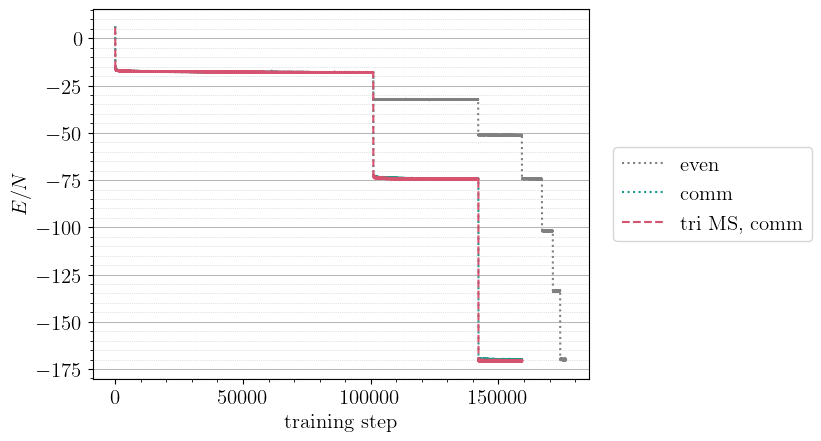

In [7]:
fig, ax = plt.subplots()

## open even L run
L = Ls_even[-1]
energies = obc_data['even'][f"L={L}"]['energies']
print(len(energies))

ax.plot(np.arange(len(energies)),energies,linestyle=even_linestyle,
            color=even_color,label=f'even')  

## open commensurate L run
L = Ls_comm[2]
energies = obc_data['comm'][f"L={L}"]['energies']
print(len(energies))

ax.plot(np.arange(len(energies)),energies,linestyle=comm_linestyle,
            color=comm_color,label=f'comm')  

## Tri MS open commensurate L run
L = Ls_comm[2]
energies = obc_data['TriMS'][f"L={L}"]['energies']
print(len(energies))

ax.plot(np.arange(len(energies)),energies,linestyle=trims_linestyle,
            color=trims_color,label=f'tri MS, comm')  

add_gridlines(axes='y')

# ax.set_ylim(-80,-70)
ax.set_xlabel(r'training step')
ax.set_ylabel(r'$E/N$')

handles, labels = ax.get_legend_handles_labels()
# order = np.roll(np.arange(len(handles)),shift=2)
order=np.arange(len(handles))
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], ncol=1, 
          bbox_to_anchor=(1.25,0.5),loc='center')

# plt.ylim(-175,-165)
plt.show()

# Energies

/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/numpy/lib/function_base.py:626: ComplexWarning: Casting complex values to real discards the imaginary part
  a = asarray(a, dtype=dtype, order=order)
/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/numpy/lib/function_base.py:626: ComplexWarning: Casting complex values to real discards the imaginary part
  a = asarray(a, dtype=dtype, order=order)
/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covarian

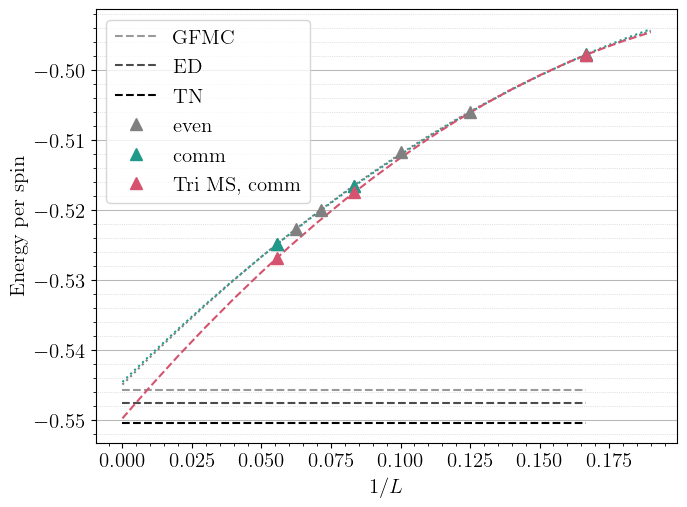

In [8]:
fig, ax = plt.subplots(figsize=square_fig_size)

## open even L run
plot_x = []
plot_y = []
for l in Ls_even:
    plot_x.append(1/l)
    plot_y.append(obc_data['even'][f"L={l}"]['final energy'])

ax.errorbar(plot_x,plot_y,fmt='o',
            marker=even_marker,markersize=even_ms,color=even_color,label=f'even')  

if len(plot_x)> 2:
        params, covariance = curve_fit(second_order, plot_x, plot_y)
        x_mesh = np.arange(0,0.2,0.01)
        ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
                color=even_color,linestyle=even_linestyle)

## open commensurate L run
plot_x = []
plot_y = []
for l in Ls_comm[:3]:
    if 'final energy' in obc_data['comm'][f"L={l}"].keys():
        plot_x.append(1/l)
        plot_y.append(obc_data['comm'][f"L={l}"]['final energy'])

ax.errorbar(plot_x,plot_y,fmt='o',
            marker=comm_marker,markersize=comm_ms,color=comm_color,label=f'comm')  

if len(plot_x)> 2:
        params, covariance = curve_fit(second_order, plot_x, plot_y)
        x_mesh = np.arange(0,0.2,0.01)
        ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
                color=comm_color,linestyle=comm_linestyle)

# Tri MS open commensurate L run
plot_x = []
plot_y = []
for l in Ls_comm[:3]:
    if 'final energy' in obc_data['TriMS'][f"L={l}"].keys():
        plot_x.append(1/l)
        plot_y.append(obc_data['TriMS'][f"L={l}"]['final energy'])

ax.errorbar(plot_x,plot_y,fmt='o',
            marker=trims_marker,markersize=trims_ms,color=trims_color,label=f'Tri MS, comm')  

if len(plot_x)> 2:
        params, covariance = curve_fit(second_order, plot_x, plot_y)
        x_mesh = np.arange(0,0.2,0.01)
        ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
                color=trims_color,linestyle=trims_linestyle)

## Literature values
ax.hlines(-0.1819*3,0,max(1/Ls_comm),color='k',alpha=0.4,linestyle='--',label='GFMC')
ax.hlines(-0.1825*3,0,max(1/Ls_comm),color='k',alpha=0.7,linestyle='--',label='ED')
ax.hlines(-0.55038,0,max(1/Ls_comm),color='k',alpha=1,linestyle='--',label='TN')
# ax.hlines(-0.560313,0,max(1/Ls_comm),color='grey',linestyle='--',label='Chris GCNN 36 spins$')

add_gridlines(axes='y')

ax.set_xlabel(r'$1/L$')
ax.set_ylabel(r'Energy per spin')

handles, labels = ax.get_legend_handles_labels()
order=np.arange(len(handles))
ax.legend()

filename = 'energies_open'
plt.savefig('./final_figures/'+filename+'.pdf',bbox_inches='tight',pad_inches=0.1)

plt.show()

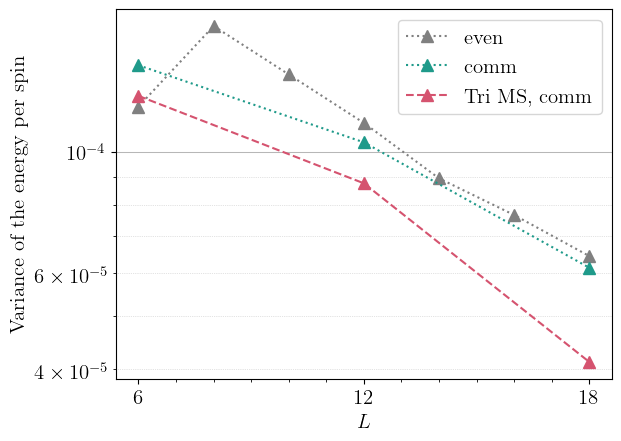

In [25]:
fig, ax = plt.subplots()

## open even L run
plot_x = []
plot_y = []
for l in Ls_even:
    plot_x.append(l)
    plot_y.append(obc_data['even'][f"L={l}"]['final energy var'])

ax.errorbar(plot_x,plot_y,linestyle=even_linestyle,
            marker=even_marker,markersize=even_ms,color=even_color,label=f'even')  

## open commensurate L run
plot_x = []
plot_y = []
for l in Ls_comm[:3]:
    if 'final energy var' in obc_data['comm'][f"L={l}"].keys():
        plot_x.append(l)
        plot_y.append(obc_data['comm'][f"L={l}"]['final energy var'])

ax.errorbar(plot_x,plot_y,linestyle=comm_linestyle,
            marker=comm_marker,markersize=comm_ms,color=comm_color,label=f'comm')  

# Tri MS open commensurate L run
plot_x = []
plot_y = []
for l in Ls_comm[:3]:
    if 'final energy var' in obc_data['TriMS'][f"L={l}"].keys():
        plot_x.append(l)
        plot_y.append(obc_data['TriMS'][f"L={l}"]['final energy var'])

ax.errorbar(plot_x,plot_y,linestyle=trims_linestyle,
            marker=trims_marker,markersize=trims_ms,color=trims_color,label=f'Tri MS, comm')  

add_gridlines(axes='y')
set_x_ticks(axes=ax,cutoff=-2)
ax.set_yscale('log')
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'Variance of the energy per spin')

handles, labels = ax.get_legend_handles_labels()
# order = np.roll(np.arange(len(handles)),shift=2)
order=np.arange(len(handles))
ax.legend()

filename = 'energy_vars_open'
plt.savefig('./final_figures/'+filename+'.pdf',bbox_inches='tight',pad_inches=0.1)

plt.show()

### V-scores

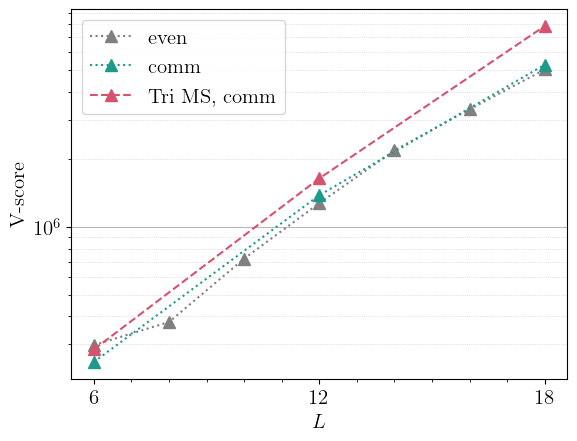

In [26]:
fig, ax = plt.subplots()

## open even L run
plot_x = []
plot_y = []
for l in Ls_even:
    plot_x.append(l)
    var = obc_data['even'][f"L={l}"]['final energy var']
    en = obc_data['even'][f"L={l}"]['final energy var']
    vscore = l**2 * var / (en**2)
    plot_y.append(vscore)

ax.errorbar(plot_x,plot_y,linestyle=even_linestyle,
            marker=even_marker,markersize=even_ms,color=even_color,label=f'even')  

## open commensurate L run
plot_x = []
plot_y = []
for l in Ls_comm[:3]:
    if 'final energy var' in obc_data['comm'][f"L={l}"].keys():
        plot_x.append(l)
        var = obc_data['comm'][f"L={l}"]['final energy var']
        en = obc_data['comm'][f"L={l}"]['final energy var']
        vscore = l**2 * var / (en**2)
        plot_y.append(vscore)

ax.errorbar(plot_x,plot_y,linestyle=comm_linestyle,
            marker=comm_marker,markersize=comm_ms,color=comm_color,label=f'comm')  

# Tri MS open commensurate L run
plot_x = []
plot_y = []
for l in Ls_comm[:3]:
    if 'final energy var' in obc_data['TriMS'][f"L={l}"].keys():
        plot_x.append(l)
        var = obc_data['TriMS'][f"L={l}"]['final energy var']
        en = obc_data['TriMS'][f"L={l}"]['final energy var']
        vscore = l**2 * var / (en**2)
        plot_y.append(vscore)

ax.errorbar(plot_x,plot_y,linestyle=trims_linestyle,
            marker=trims_marker,markersize=trims_ms,color=trims_color,label=f'Tri MS, comm')  

add_gridlines(axes='y')
set_x_ticks(axes=ax,cutoff=-2)
ax.set_yscale('log')
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'V-score')

handles, labels = ax.get_legend_handles_labels()
# order = np.roll(np.arange(len(handles)),shift=2)
order=np.arange(len(handles))
ax.legend()

filename = 'energy_vscores_open'
plt.savefig('./final_figures/'+filename+'.pdf',bbox_inches='tight',pad_inches=0.1)

plt.show()

# Correlations

/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[0.04858068977795008, 0.0284811842650387, 0.023826000976844144]


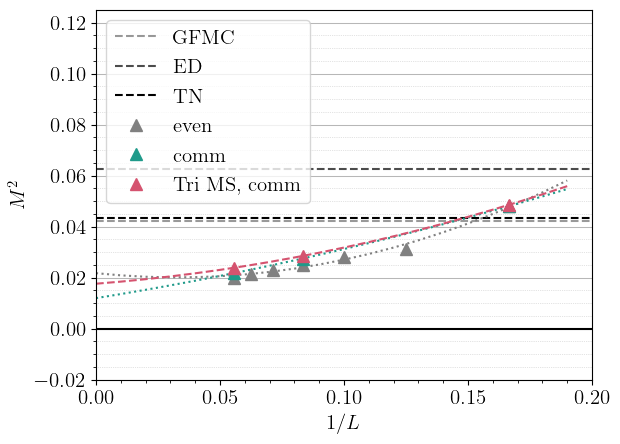

In [11]:
fig, ax = plt.subplots()

## open even L run
plot_x = []
plot_y = []
for l in Ls_even:
    plot_x.append(1/l)
    plot_y.append(obc_data['even'][f"L={l}"]['Sk']/l**2)
params, covariance = curve_fit(second_order, plot_x, plot_y)

ax.errorbar(plot_x,plot_y,fmt='o',
            marker=even_marker,markersize=even_ms,color=even_color,label=f'even')  
x_mesh = np.arange(0,0.2,0.01)
ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
        color=even_color,linestyle=even_linestyle)

## open commensurate L run
plot_x = []
plot_y = []
for l in Ls_comm[:3]:
    if 'Sk' in obc_data['comm'][f"L={l}"].keys():
        plot_x.append(1/l)
        plot_y.append(obc_data['comm'][f"L={l}"]['Sk']/l**2)
params, covariance = curve_fit(second_order, plot_x, plot_y)

ax.errorbar(plot_x,plot_y,fmt='o',
            marker=comm_marker,markersize=comm_ms,color=comm_color,label=f'comm')  
x_mesh = np.arange(0,0.2,0.01)
ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
        color=comm_color,linestyle=comm_linestyle)

# Tri MS open commensurate L run
plot_x = []
plot_y = []
for l in Ls_comm[:3]:
    if 'Sk' in obc_data['TriMS'][f"L={l}"].keys():
        plot_x.append(1/l)
        plot_y.append(obc_data['TriMS'][f"L={l}"]['Sk']/l**2)

print(plot_y)
ax.errorbar(plot_x,plot_y,fmt='o',
            marker=trims_marker,markersize=trims_ms,color=trims_color,label=f'Tri MS, comm')  
if len(plot_x)> 2:
        params, covariance = curve_fit(second_order, plot_x, plot_y)
        x_mesh = np.arange(0,0.2,0.01)
        ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
                color=trims_color,linestyle=trims_linestyle)


## Literature values
ax.hlines(0,0,0.2,color='k',linestyle='-')
ax.hlines(0.205**2,0,0.2,color='k',alpha=0.4,linestyle='--',label='GFMC')
ax.hlines(0.25**2,0,0.2,color='k',alpha=0.7,linestyle='--',label='ED')
ax.hlines(0.208**2,0,0.2,color='k',alpha=1,linestyle='--',label='TN')

add_gridlines(axes='y')

ax.set_xlabel(r'$1/L$')
ax.set_ylabel(r'$M^2$')
ax.set_ylim(-0.02,0.125)
ax.set_xlim(0,.2)

handles, labels = ax.get_legend_handles_labels()
# order = np.roll(np.arange(len(handles)),shift=2)
order=np.arange(len(handles))
ax.legend()

filename = 'M_scaling_open'
plt.savefig('./final_figures/'+filename+'.pdf',bbox_inches='tight',pad_inches=0.1)

plt.show()

- everything is significantly reduced from what we see with PBC
- tri MS only makes a small difference
- not sure whats going on with even L simulations... maybe need larger system sizes

# Visualize correlations

In [12]:
markersize=10000

In [13]:
which_corrs='comm'
if which_corrs=='TriMS':
    color=trims_color
    reorder=True
elif which_corrs=='comm':
    color=comm_color
    reorder=False
else:
    color=mcolors.to_rgba(even_color)
    reorder=False
    print(color)

In [14]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(color[0], 1, N)[::-1]
vals[:, 1] = np.linspace(color[1], 1, N)[::-1]
vals[:, 2] = np.linspace(color[2], 1, N)[::-1]
newcmp = ListedColormap(vals)

36 spins
144 spins
324 spins


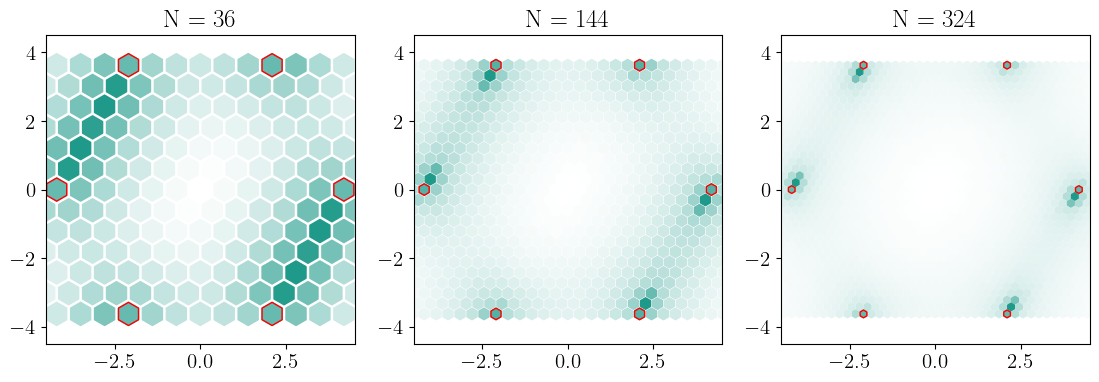

In [15]:
fig, axs = plt.subplots(1,3,figsize=(column_width*3,column_width))

p1 = (1., 0.)
p2 = (-1./2, np.sqrt(3)/2)

use_zz = False

for i, L in enumerate(Ls_comm[:-1]):    
    N = L**2
    print(f"{N} spins")

    if 'Sz' in obc_data[which_corrs][f"L={L}"].keys():

        kpointsx,kpointsy = get_k_mesh(L)
        if use_zz:
            rnn_Sij = 3*obc_data[which_corrs][f"L={L}"]['Sz']
        else:
            rnn_Sij = obc_data[which_corrs][f"L={L}"]['Sz'] + obc_data[which_corrs][f"L={L}"]['Sxy']

        Sk = calculate_tri_kspace_correlations(L, rnn_Sij, kpointsx, kpointsy, p1, p2, periodic=False, reorder=reorder)
        corrs = Sk.flatten()

        marker_size = markersize / N
        sc = axs[i].scatter(kpointsx, kpointsy, marker='h',s=marker_size, c=corrs, cmap=newcmp,)

        highlight_k_points(axs[i],marker_size=marker_size)
        
        axs[i].set_title(f'N = {N}')
        axs[i].set_ylim(-4.5,4.5)
        axs[i].set_xlim(-4.5,4.5)
        axs[i].set_box_aspect(1)
        # if i==2:
        #     fig.colorbar(sc, ax=axs[i])
            
plt.tight_layout()
plt.show()

324 spins


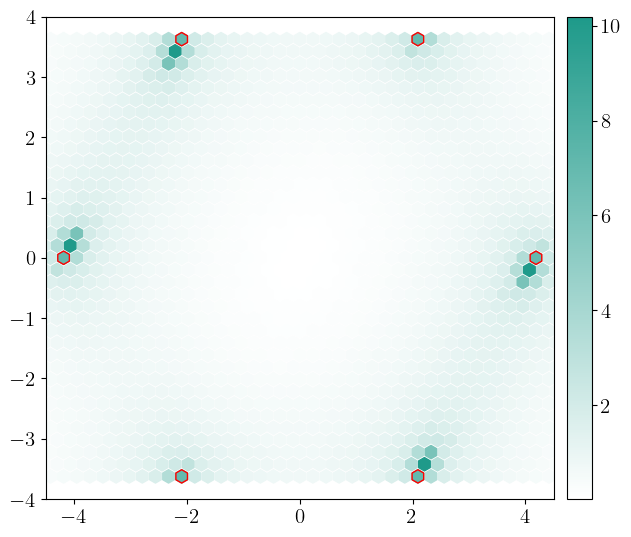

In [16]:
fig, axs = plt.subplots(figsize=square_fig_size)

p1 = (1., 0.)
p2 = (-1./2, np.sqrt(3)/2)

use_zz = False

L=18
N = L**2
print(f"{N} spins")

if 'Sz' in obc_data[which_corrs][f"L={L}"].keys():

    kpointsx,kpointsy = get_k_mesh(L)
    if use_zz:
        rnn_Sij = 3*obc_data[which_corrs][f"L={L}"]['Sz']
    else:
        rnn_Sij = obc_data[which_corrs][f"L={L}"]['Sz'] + obc_data[which_corrs][f"L={L}"]['Sxy']

    Sk = calculate_tri_kspace_correlations(L, rnn_Sij, kpointsx, kpointsy, p1, p2, periodic=False, reorder=reorder)
    corrs = Sk.flatten()

    marker_size = 3*markersize / N
    sc = axs.scatter(kpointsx, kpointsy, marker='h',s=marker_size, c=corrs, cmap=newcmp,)

    highlight_k_points(axs,marker_size=marker_size)   
     
    axs.set_ylim(-4,4)
    axs.set_xlim(-4.5,4.5)
    axs.set_box_aspect(0.95)
    plt.colorbar(sc, pad=0.02) 
            
plt.tight_layout()

filename = f'k_space_corrs_N{N}_{which_corrs}'
plt.savefig('./final_figures/'+filename+'.pdf',bbox_inches='tight',pad_inches=0.1)

plt.show()

## Subsampling

324 spins, 324 spins in bulk
0.03144434484468401


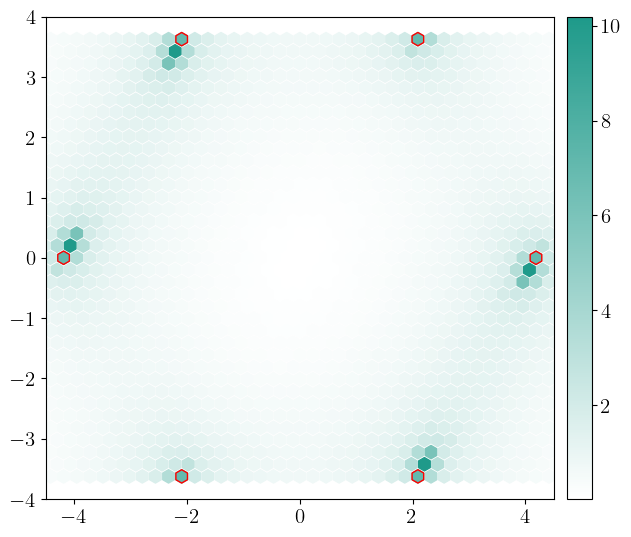

324 spins, 196 spins in bulk
0.041227038212972536


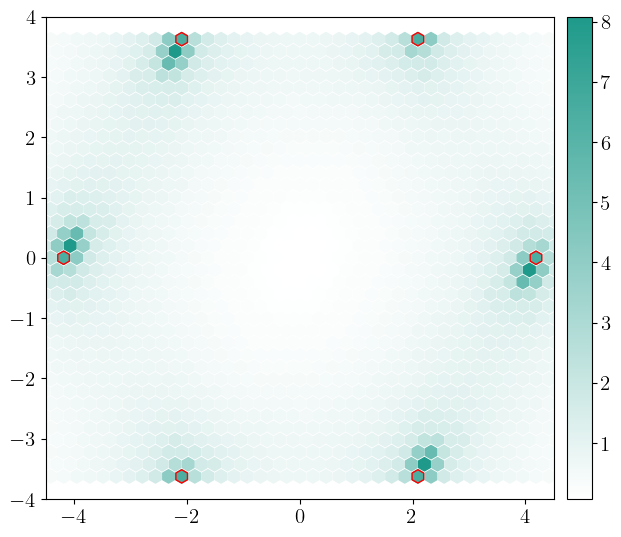

324 spins, 100 spins in bulk
0.05280669756507916


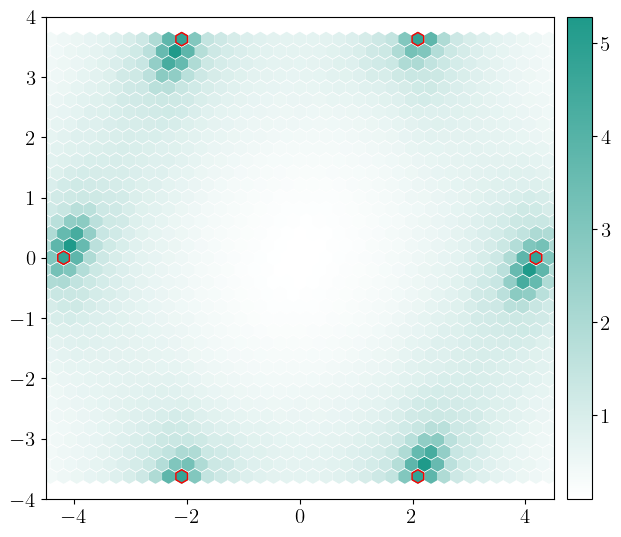

In [17]:
p1 = (1., 0.)
p2 = (-1./2, np.sqrt(3)/2)

use_zz = False

L=18
boundary=2
for boundary in [0,2,4]:
    fig, axs = plt.subplots(figsize=square_fig_size)

    L_bulk=L-(2*boundary)
    N = L**2
    print(f"{N} spins, {L_bulk**2} spins in bulk")

    if 'Sz' in obc_data[which_corrs][f"L={L}"].keys():

        kpointsx,kpointsy = get_k_mesh(L)
        if use_zz:
            rnn_Sij = 3*obc_data[which_corrs][f"L={L}"]['Sz']
        else:
            rnn_Sij = obc_data[which_corrs][f"L={L}"]['Sz'] + obc_data[which_corrs][f"L={L}"]['Sxy']

        Sk = calculate_tri_kspace_correlations(L, rnn_Sij, kpointsx, kpointsy, p1, p2, periodic=False, reorder=reorder, boundary_size=boundary)
        corrs = Sk.flatten()
        print(max(corrs)/L_bulk**2)

        marker_size = 3*markersize / N
        sc = axs.scatter(kpointsx, kpointsy, marker='h',s=marker_size, c=corrs, cmap=newcmp,)

        highlight_k_points(axs,marker_size=marker_size)   
        
        axs.set_ylim(-4,4)
        axs.set_xlim(-4.5,4.5)
        axs.set_box_aspect(0.95)
        plt.colorbar(sc, pad=0.02) 
                
    plt.tight_layout()

    plt.show()

In [18]:
p1 = (1., 0.)
p2 = (-1./2, np.sqrt(3)/2)

for which_corrs in ['even','comm','TriMS']:
    if which_corrs=='TriMS':
        reorder=True
    else:
        reorder=False
    for og_boundary in [0,1,2]:
        for L_i,L in enumerate([6,12,18]):
            boundary = og_boundary #+(2*L_i)
            L_bulk=L-(2*boundary)
            N = L**2
            print(f"{N} spins, {L_bulk**2} spins in bulk")

            if 'Sz' in obc_data[which_corrs][f"L={L}"].keys():

                kpointsx,kpointsy = get_k_mesh(L)
                rnn_Sij = obc_data[which_corrs][f"L={L}"]['Sz'] + obc_data[which_corrs][f"L={L}"]['Sxy']

                all_Sk = calculate_tri_kspace_correlations(L, rnn_Sij, kpointsx, kpointsy, p1, p2, periodic=False, reorder=reorder, boundary_size=boundary)
                Sk,_ = calculate_structure_factor(L,rnn_Sij,periodic=False,reorder=reorder,boundary_size=boundary)
                if (L==6) and (which_corrs=='even'):
                    obc_data[which_corrs][f"L={L}"][f'Sk boundary={og_boundary}'] = (Sk/L_bulk**2)/4
                    obc_data[which_corrs][f"L={L}"][f'Sk (peak) boundary={og_boundary}'] = (max(all_Sk)/L_bulk**2)/4
                else:
                    obc_data[which_corrs][f"L={L}"][f'Sk boundary={og_boundary}'] = (Sk/L_bulk**2)
                    obc_data[which_corrs][f"L={L}"][f'Sk (peak) boundary={og_boundary}'] = (max(all_Sk)/L_bulk**2)


36 spins, 36 spins in bulk
144 spins, 144 spins in bulk
324 spins, 324 spins in bulk
36 spins, 16 spins in bulk
144 spins, 100 spins in bulk
324 spins, 256 spins in bulk
36 spins, 4 spins in bulk
144 spins, 64 spins in bulk
324 spins, 196 spins in bulk
36 spins, 36 spins in bulk
144 spins, 144 spins in bulk
324 spins, 324 spins in bulk
36 spins, 16 spins in bulk
144 spins, 100 spins in bulk
324 spins, 256 spins in bulk
36 spins, 4 spins in bulk
144 spins, 64 spins in bulk
324 spins, 196 spins in bulk
36 spins, 36 spins in bulk
144 spins, 144 spins in bulk
324 spins, 324 spins in bulk
36 spins, 16 spins in bulk
144 spins, 100 spins in bulk
324 spins, 256 spins in bulk
36 spins, 4 spins in bulk
144 spins, 64 spins in bulk
324 spins, 196 spins in bulk


/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


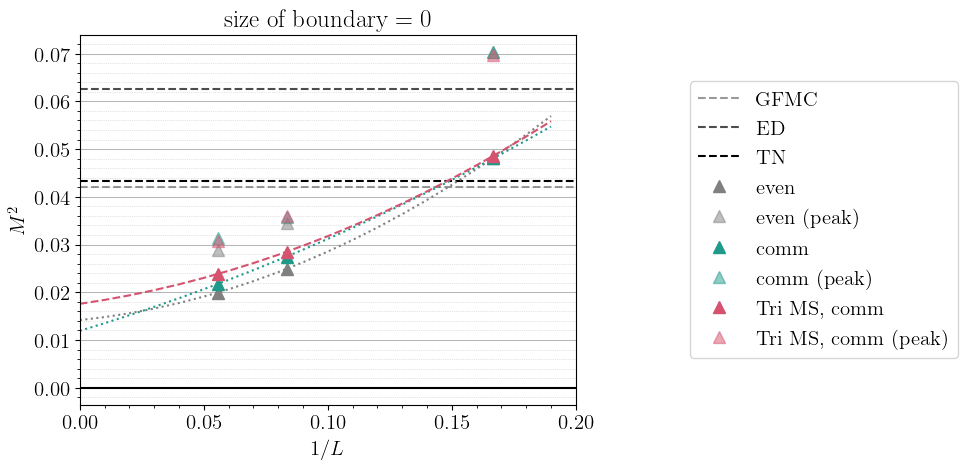

In [19]:
fig, ax = plt.subplots()
boundary = 0

## open even L run
plot_x = []
plot_x_peak = []
plot_y = []
plot_y_peak = []
for l in Ls_even:
    plot_x.append(1/l)
#     plot_y.append(obc_data['even'][f"L={l}"]['Sk']/l**2)
    if 'Sk boundary=2' in obc_data['even'][f"L={l}"].keys():
        plot_x_peak.append(1/l)
        plot_y.append(obc_data['even'][f"L={l}"][f'Sk boundary={boundary}'])
        plot_y_peak.append(obc_data['even'][f"L={l}"][f'Sk (peak) boundary={boundary}'])
params, covariance = curve_fit(second_order, plot_x_peak, plot_y)

ax.errorbar(plot_x_peak,plot_y,fmt='o',
            marker=even_marker,markersize=even_ms,color=even_color,label=f'even')  
ax.errorbar(plot_x_peak,plot_y_peak,fmt='o',
            marker=even_marker,markersize=even_ms,color=even_color,alpha=0.5,label=f'even (peak)')  
x_mesh = np.arange(0,0.2,0.01)
ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
        color=even_color,linestyle=even_linestyle)

## open commensurate L run
plot_x = []
plot_y = []
plot_y_peak = []
for l in Ls_comm[:3]:
    if 'Sk' in obc_data['comm'][f"L={l}"].keys():
        plot_x.append(1/l)
        # plot_y.append(obc_data['comm'][f"L={l}"]['Sk']/l**2)
        plot_y.append(obc_data['comm'][f"L={l}"][f'Sk boundary={boundary}'])
        plot_y_peak.append(obc_data['comm'][f"L={l}"][f'Sk (peak) boundary={boundary}'])
params, covariance = curve_fit(second_order, plot_x, plot_y)

ax.errorbar(plot_x,plot_y,fmt='o',
            marker=comm_marker,markersize=comm_ms,color=comm_color,label=f'comm')  
ax.errorbar(plot_x,plot_y_peak,fmt='o',
            marker=comm_marker,markersize=comm_ms,color=comm_color,alpha=0.5,label=f'comm (peak)')  
x_mesh = np.arange(0,0.2,0.01)
ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
        color=comm_color,linestyle=comm_linestyle)

# Tri MS open commensurate L run
plot_x = []
plot_y = []
plot_y_peak = []
for l in Ls_comm[:3]:
    if 'Sk' in obc_data['TriMS'][f"L={l}"].keys():
        plot_x.append(1/l)
        # plot_y.append(obc_data['TriMS'][f"L={l}"]['Sk']/l**2)
        plot_y.append(obc_data['TriMS'][f"L={l}"][f'Sk boundary={boundary}'])
        plot_y_peak.append(obc_data['TriMS'][f"L={l}"][f'Sk (peak) boundary={boundary}'])

ax.errorbar(plot_x,plot_y,fmt='o',
            marker=trims_marker,markersize=trims_ms,color=trims_color,label=f'Tri MS, comm')  
ax.errorbar(plot_x,plot_y_peak,fmt='o',
            marker=trims_marker,markersize=trims_ms,color=trims_color,alpha=0.5,label=f'Tri MS, comm (peak)')  
if len(plot_x)> 2:
        params, covariance = curve_fit(second_order, plot_x, plot_y)
        x_mesh = np.arange(0,0.2,0.01)
        ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
                color=trims_color,linestyle=trims_linestyle)


## Literature values
ax.hlines(0,0,0.2,color='k',linestyle='-')
ax.hlines(0.205**2,0,0.2,color='k',alpha=0.4,linestyle='--',label='GFMC')
ax.hlines(0.25**2,0,0.2,color='k',alpha=0.7,linestyle='--',label='ED')
ax.hlines(0.208**2,0,0.2,color='k',alpha=1,linestyle='--',label='TN')

add_gridlines(axes='y')

ax.set_xlabel(r'$1/L$')
ax.set_ylabel(r'$M^2$')
# ax.set_ylim(-0.02,0.125)
ax.set_xlim(0,.2)
ax.set_title(f"size of boundary $={boundary}$")

handles, labels = ax.get_legend_handles_labels()
# order = np.roll(np.arange(len(handles)),shift=2)
order=np.arange(len(handles))
ax.legend(loc='center',bbox_to_anchor=(1.5,0.5))

plt.show()